In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# --- 1. Data Fetching ---
# Selected Apple Stock
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'

print(f"--- 1. Fetching data for {ticker} from {start_date} to {end_date} ---")

stock_data = yf.download(ticker, start=start_date, end=end_date)

print("\nStock Data Head:")
print(stock_data.head())

--- 1. Fetching data for AAPL from 2020-01-01 to 2023-12-31 ---


C:\Users\syeda\AppData\Local\Temp\ipykernel_17320\1096146073.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Stock Data Head:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538528  72.598907  71.292319  71.545905  135480400
2020-01-03  71.833282  72.594048  71.608677  71.765659  146322800
2020-01-06  72.405685  72.444328  70.703020  70.954195  118387200
2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
2020-01-08  73.224411  73.526303  71.768086  71.768086  132079200


In [3]:
# --- 2. Feature Engineering ---

# Creating a new Target column by shifting the Close column up by one row.
stock_data['Target'] = stock_data['Close'].shift(-1)

# Dropping the last row as it will have a NaN value for the Target
stock_data.dropna(inplace=True)

print("\nData after creating 'Target' and dropping NaN:")
print(stock_data.tail())


Data after creating 'Target' and dropping NaN:
Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2023-12-21  193.045609  195.425469  191.875522  194.453701  46482500   
2023-12-22  191.974670  193.769472  191.349955  193.541392  37149600   
2023-12-26  191.429306  192.262250  191.211152  191.984602  28919300   
2023-12-27  191.528458  191.875525  189.485754  190.874010  48087700   
2023-12-28  191.954849  193.025784  191.548288  192.510145  34049900   

Price           Target  
Ticker                  
Date                    
2023-12-21  191.974670  
2023-12-22  191.429306  
2023-12-26  191.528458  
2023-12-27  191.954849  
2023-12-28  190.913651  


In [4]:
# --- 3. Model Training ---
features = ['Open', 'High', 'Low', 'Volume']
X = stock_data[features]
y = stock_data['Target']

# Setting shuffle=False because this is time-series data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


model = LinearRegression()
model.fit(X_train, y_train)


Training set size: 804 samples
Test set size: 201 samples


LinearRegression()

In [5]:
# --- 4. Prediction & Evaluation ---
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- 4. Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- 4. Model Evaluation ---
Mean Squared Error (MSE): 4.9648
R-squared (R2) Score: 0.9579



--- 5. Plotting Actual vs. Predicted Prices ---


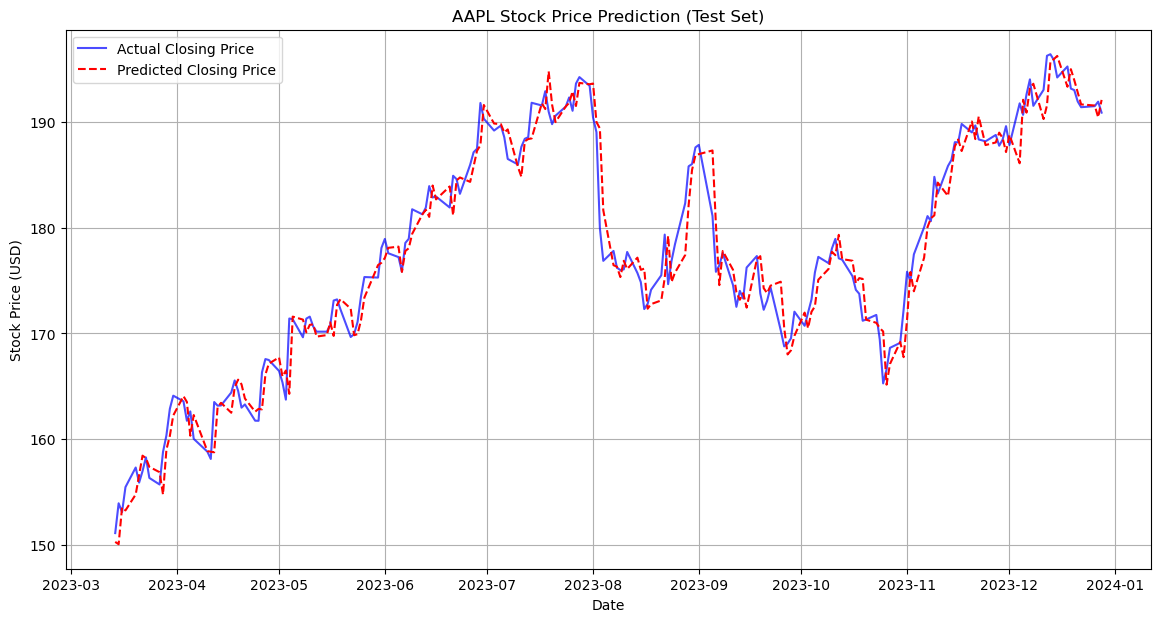

In [6]:
# --- 5. Visualization ---
print("\n--- 5. Plotting Actual vs. Predicted Prices ---")

plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

plt.figure(figsize=(14, 7))
plt.plot(plot_df['Actual'], label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(plot_df['Predicted'], label='Predicted Closing Price', color='red', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

